In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
#%matplotlib notebook

In [9]:
#pip install seaborn==0.11.2

In [10]:
sns.__version__
# Must be at least 0.11.2, if not, uncomment the above cell and restart the kernell

'0.11.2'

In [11]:
#pip install statsmodels


In [12]:
# Must be at least 0.12.0, if not, uncomment the above cell and restart the kernell
sm.__version__

'0.13.2'

In [13]:
#pip install seaborn

In [14]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# The following describes the dataset variables:
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's


In [15]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
boston_df.drop(columns='Unnamed: 0',inplace=True)

## Task 4: 
Generate the following and explain your findings:

1. For the *"Median value of owner-occupied homes"* provide a **boxplot** (MEDV)

2. Provide a  **bar plot** for the *Charles river variable* (CHAS)

3. Provide a **boxplot** for the *MEDV variable vs the AGE* variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older) (MEDV, AGE 3 groups 35<= , >35 und <70, => 70)

4. Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship? (NOX, INDUS)

5. Create a **histogram** for the pupil to teacher ratio variable (PTRATIO)

In [17]:
#4.1 For the *"Median value of owner-occupied homes"* provide a boxplot (MEDV)
boston_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


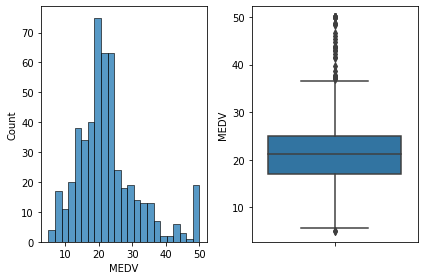

In [18]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(x='MEDV', data=boston_df,ax=axs[0])

sns.boxplot(y='MEDV', data=boston_df,ax=axs[1])
plt.tight_layout()


Box ist composed by Q1 (25%), Q2 (Median) and Q3(75%).
Whisker on Top and Bottom represents 1.5*IQR (Inner Quartile Range - from 25% till 75%) and the Max (97,5%) and Min (2,5%) values
Points outside are Outliners ( not outliners from min max, range, but from the 2,5% and 97,5% from the whiskers) 
Outliners above 3 IQR, not shonw below are called extrem Outliners

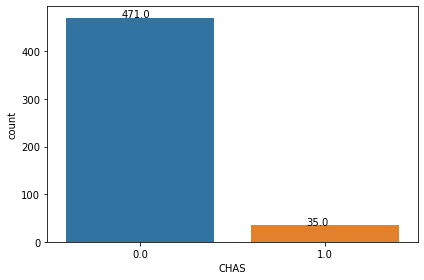

In [19]:
# 4.2 Provide a bar plot for the Charles river variable (CHAS)
boston_df['CHAS'].describe()
ax=sns.countplot(data=boston_df,x='CHAS')
# 1 if it tract bounds river, 0 otherwise
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))
plt.tight_layout()


There are 471 away from the River and less then 10% tract bound river 

In [20]:
# 4.3 Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older) (MEDV, AGE 3 groups 35<= , >35 und <70, => 70)
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

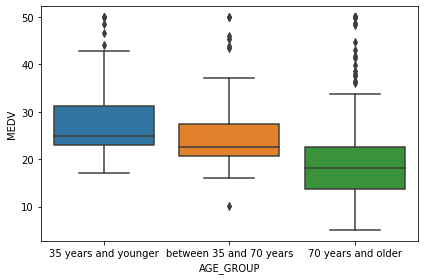

In [21]:
sns.boxplot(x='AGE_GROUP',y='MEDV', data=boston_df, order=['35 years and younger', 'between 35 and 70 years','70 years and older'])
plt.tight_layout()

We can see, that MEDV sinks with the age , Mean Values are not exactly the same

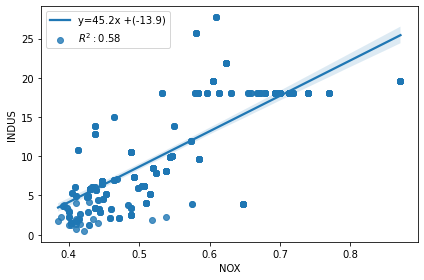

In [22]:
# 4.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship? (NOX, INDUS)

ax=sns.regplot(x='NOX',y='INDUS',data=boston_df)

# assuming you computed r_squared which is the coefficient of determination somewhere else



slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(boston_df['NOX'],boston_df['INDUS'])
label_line_1 = r'y={0:.1f}x +({1:.1f})'.format(slope,intercept)
label_line_2 = r'$R^2:{0:.2f}$'.format(r_value**2)

ax.legend([label_line_1,label_line_2],)
plt.tight_layout()
#  Medium linear association R2 (0.58) 


We can see an averaged correlation between NOX and Indus 

In [23]:
#double check with Models sm
import statsmodels.api as sm
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           7.91e-98
Time:                        13:44:36   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

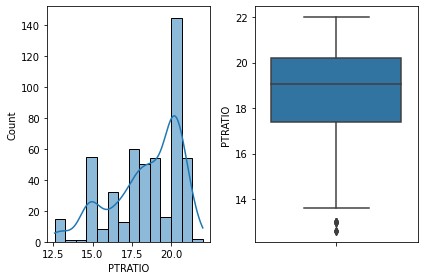

In [24]:
# 4.5 Create a histogram for the pupil to teacher ratio variable (PTRATIO)

fig, axs = plt.subplots(ncols=2)
sns.histplot(x='PTRATIO', data=boston_df,ax=axs[0],kde=True)
sns.boxplot(y='PTRATIO', data=boston_df,ax=axs[1])
plt.tight_layout()

High amount of 20 Pupils per Teacher , counted 140, seems like a limit per district, as its distribution

# Task 5 :

For each of the following questions;

1. Is there a significant difference in median value of houses bounded (MEDV) by the Charles river or not (CHAS)? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (Levene)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
- State your hypothesis.
-  Use Î± = 0.05
-  Perform the test Statistics.
-  State the conclusion from the test.

### 5.1 Is there a significant difference in median value of houses bounded (MEDV) by the Charles river or not (CHAS)? (T-test for independent samples)
#### Ho there is no significant diffenrence in values for houese by the river
#### Ha there is a significantdifference in values



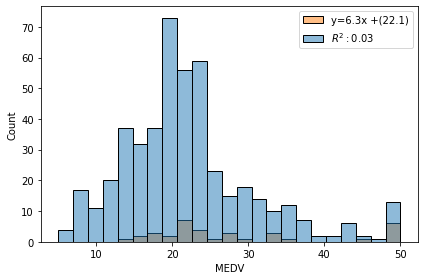

In [25]:
ax=sns.histplot(x='MEDV',data=boston_df, hue = 'CHAS')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(boston_df['CHAS'],boston_df['MEDV'])
label_line_1 = r'y={0:.1f}x +({1:.1f})'.format(slope,intercept)
label_line_2 = r'$R^2:{0:.2f}$'.format(r_value**2)

ax.legend([label_line_1,label_line_2],)
plt.tight_layout()

In [26]:
    scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)    

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

#### Conclusion: Like the t-test, the p-value is less than the alpha (Î±) level = 0.05, 
#### We reject the null hypothesis as there is evidence that there is a difference in mean values based on boundary to river. 


### 5.2.1  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? Equality of Variances 
#### Ho: Âµ1=Âµ2=Âµ3
#### Ha: at least one of the means differ


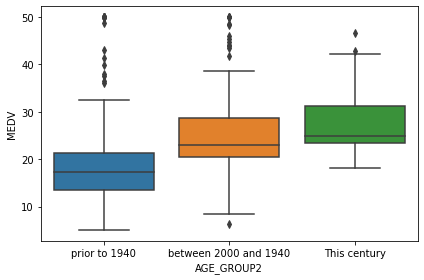

In [27]:
boston_df.loc[(boston_df['AGE'] <= 22), 'AGE_GROUP2'] = 'This century'
boston_df.loc[(boston_df['AGE'] > 22) & (boston_df['AGE'] < 82), 'AGE_GROUP2'] = 'between 2000 and 1940'
boston_df.loc[(boston_df['AGE'] >= 82), 'AGE_GROUP2'] = 'prior to 1940'
sns.boxplot(x='AGE_GROUP2',y='MEDV', data=boston_df, order=['prior to 1940','between 2000 and 1940', 'This century'])
plt.tight_layout()

In [28]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE_GROUP2', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)


               df        sum_sq      mean_sq          F        PR(>F)
AGE_GROUP2    2.0   5398.107679  2699.053839  36.379689  1.752796e-15
Residual    503.0  37318.187736    74.191228        NaN           NaN


#### Conclusion:  since p < 0.05, we reject the Ho, there is indeed a statistical difference in MEDV for houses before 1940

In [29]:
# 5.3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
# (Pearson Correlation)
# Ho: There is no relationship between NOx and INDUS
# Ha: There is a a relationship

In [30]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.763651446920915, 7.913361061239593e-98)

#### Conclusion: p-Value < 0.05 ( 7.913361061239593e-98) . so we reject the Null hyp theory. Therefore there is a relationship between  NOx and INDUS

### 5.4 What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV)? (Regression analysis)
#### Ho: there is no correlation from DIS over MEDV
#### Ha: there is in deed correlation from DIS over MEDV

In [31]:


X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        13:44:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

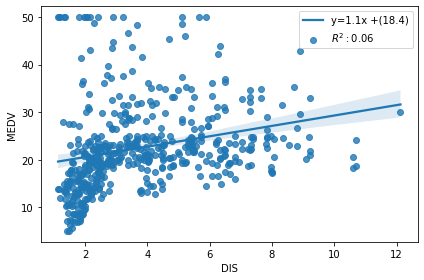

In [32]:
ax=sns.regplot(x='DIS',y='MEDV',data=boston_df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(boston_df['DIS'],boston_df['MEDV'])
label_line_1 = r'y={0:.1f}x +({1:.1f})'.format(slope,intercept)
label_line_2 = r'$R^2:{0:.2f}$'.format(r_value**2)

ax.legend([label_line_1,label_line_2],)
plt.tight_layout()


#### Conclusion: like the t-test, p-value is lower then 0.05, we reject Ho. 
#### There is a correlation between DIS und MEDV, The coefficient 1.0916 means, there is an impact on DIS over MEDV